## Задание 1


Проанализируйте набор данных и ответьте на следующие вопросы:

Какой процент наблюдений выходит за 5 и 95 перцентиль?
Какому закону распределения отвечают данные? На основе чего вы так решили?
Описание данных: metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

5-ый перцентиль=1.0, 95=52.0
меньше 5-го перцентиля=0, больше 95-го=15303, ИТОГО: 15303
В процентах от общей выборки: 4.99%
Нормальное:
KS: 0.3430
p-value: 0.0000
Экспоненциальное:
KS: 0.4535
p-value: 0.0000
Логнормальное:
KS: 0.3504
p-value: 0.0000
Гамма:
KS: 0.4839
p-value: 0.0000


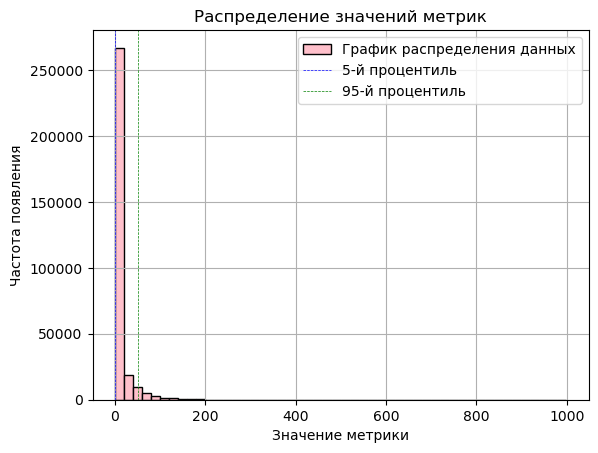

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest, norm, expon, lognorm, gamma
import pandas as pd

df = pd.read_csv('test_1_1.csv', sep=';')

# считаем квантили
p5 = df['metrics'].quantile(0.05)
p95 = df['metrics'].quantile(0.95)

count_under_p5 = (df['metrics']<p5).sum()
count_above_p95 = (df['metrics']>p95).sum()
count_sum = count_under_p5 + count_above_p95
percent = (count_sum/len(df))*100

print(f'5-ый перцентиль={p5}, 95={p95}')
print(f'меньше 5-го перцентиля={count_under_p5}, больше 95-го={count_above_p95}, ИТОГО: {count_sum}')
print(f'В процентах от общей выборки: {percent:.2f}%')

# строим распределение
plt.hist(df['metrics'], bins = 50, color='pink', edgecolor='black', label='График распределения данных')
plt.title('Распределение значений метрик')
plt.xlabel('Значение метрики')
plt.ylabel('Частота появления')

# покажу квантили на графике
plt.axvline(p5, color='blue', linestyle='--', linewidth=0.5, label='5-й процентиль')
plt.axvline(p95, color='green', linestyle='--', linewidth=0.5, label='95-й процентиль')

plt.legend()
plt.grid()

#проведем различные тесты для выявления совпадения хоть с каким-то законом распределения
params = norm.fit(df['metrics'])
stat, p_val = kstest(df['metrics'], 'norm', args=params)
print('Нормальное:')
print(f"KS: {stat:.4f}")
print(f"p-value: {p_val:.4f}")

params = expon.fit(df['metrics'])
stat, p_val = kstest(df['metrics'], 'expon', args=params)
print('Экспоненциальное:')
print(f"KS: {stat:.4f}")
print(f"p-value: {p_val:.4f}")

params = lognorm.fit(df['metrics'])
stat, p_val = kstest(df['metrics'], 'lognorm', args=params)
print('Логнормальное:')
print(f"KS: {stat:.4f}")
print(f"p-value: {p_val:.4f}")

params = gamma.fit(df['metrics'])
stat, p_val = kstest(df['metrics'], 'gamma', args=params)
print('Гамма:')
print(f"KS: {stat:.4f}")
print(f"p-value: {p_val:.4f}")






1: 
5-ый перцентиль=1.0, 95=52.0
меньше 5-го перцентиля=0, больше 95-го=15303, ИТОГО: 15303
В процентах от общей выборки: 4.99%

2:
Как минимум распределение не является нормальным. Нет необходимости даже в куку плоте.
Сделав тесты Колмагорова смирнова и вычислив пи вэлью для проверки соответствия нескольким законам распределения понимаю, что оно никакому не соответствует. Визуально больше всего походит на логнормальное
Возможно, распределение является составным из двух логнормальных
Разные преобразования даннхы также не помогли. использовала квадрат, логарифмирование, обратную дробь

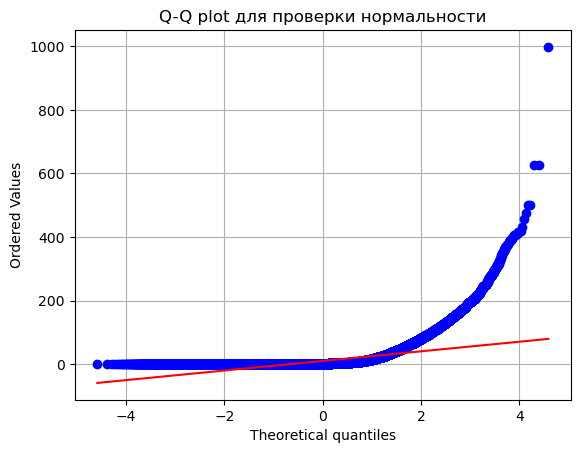

In [9]:
#Но все-таки построим куку-плот чтобы показать, что я это умею
stats.probplot(df['metrics'], dist="norm", plot=plt)
plt.title("Q-Q plot для проверки нормальности")
plt.grid()

## Задание 2
Определите, можно ли сравнить две представленные выборки t-критерием Стьюдента?
Если нельзя сравнивать t-критерием, то что будем использовать и почему?
Ответ аргументировать и описать.

Описание данных:
variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

U=4195358346.0 p_value=0.00003


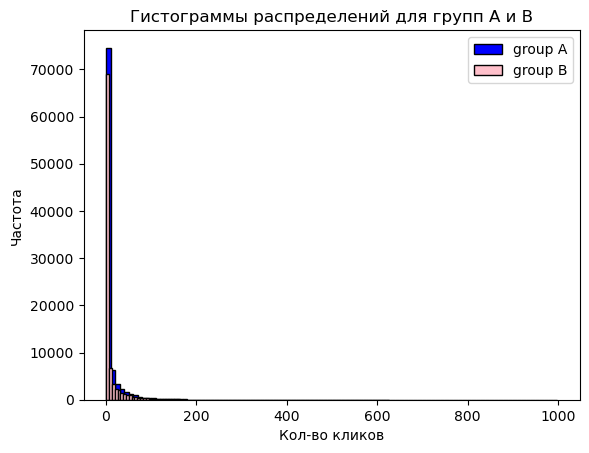

In [160]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_csv('test_1_2.csv',sep=';')

#выделим из дф значения для групп А и B

group_A = df[df['variant']=='A']['metrics'].values
group_B = df[df['variant']=='B']['metrics'].values

plt.hist(group_A, bins= 100, color='blue', edgecolor='black', label='group A')
plt.hist(group_B, bins= 100, color='pink', edgecolor='black', label='group B')

plt.title('Гистограммы распределений для групп A и B')
plt.xlabel('Кол-во кликов')
plt.ylabel('Частота')

plt.legend()
plt.grid

#используем критерий MW
statistic, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided')

print(f'U={statistic} p_value={p_value:.5f}')


Распределения, очевидно, не нормальные. Следовательно, t-критерий использовать не получится.
Используем MW так как он для непараметрических тестов, где распределение не нормальное
Имеем p_value=0.00003 -> гипотеза что распределения одинаковы отвергается.

## Задание 3

Даны две выборки по А/B тесту.

Две выборки несбалансированные — кол-во пользователей в каждой группе разное.

Метрика, которую мы измеряем в эксперименте (и которую используем для определения группы, показавшей себя лучше) — количество просмотренных страниц на пользователя.

Как вы будете принимать решение, какая группа: A или B — продемонстрировала лучшие результаты? И какие статистические методы (критерии) вы будете использовать для этого? Какие преобразования к данным в целях улучшения точности и качества стоило бы применить? Сделайте это!

variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
metrics — значение определенной метрики в сервисе; в данном случае — количество просмотренных страниц на пользователя.

Для начала нужно понять, насколько выборки гомогенные. Предлоположим, что A/A тест уже проведен и выборки репрезентативны, тогда можем делать дальнейшую обработку.
Заранее построив график, понимаю, что есть аномальные значения, к примеру значение в 998 страница(жесткий выброс относительно медианы равной 2). Их можно убрать, посчитав p99 и выкинув значения выше.

112.0 104.0


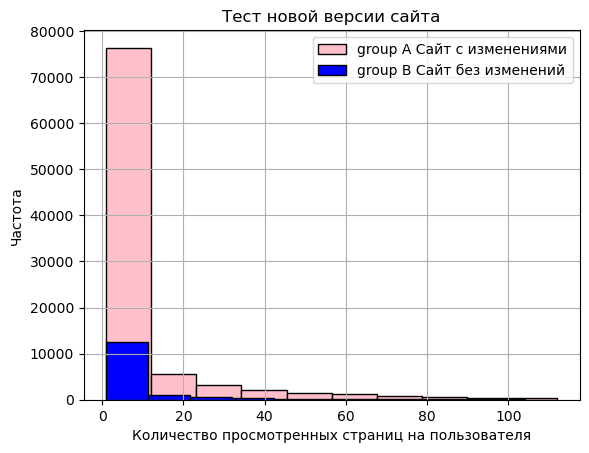

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

df = pd.read_csv('test3.csv', sep=';')

group_A = df[df['variant']=='A']
group_B = df[df['variant']=='D']

p99_A = group_A['metrics'].quantile(0.99)
p99_B = group_B['metrics'].quantile(0.99)
print(p99_A,p99_B)

group_A_tr = group_A[group_A['metrics']<= p99_A]['metrics'].values
group_B_tr = group_B[group_B['metrics']<= p99_B]['metrics'].values

plt.hist(group_A_tr, color='pink', edgecolor='black', label='group A Сайт с изменениями')
plt.hist(group_B_tr, color='blue', edgecolor='black', label='group B Сайт без изменений')

plt.title('Тест новой версии сайта')
plt.xlabel('Количество просмотренных страниц на пользователя')
plt.ylabel('Частота')

plt.legend()
plt.grid()

 с гистограммой есть сложности - разница кол-ва человек в выборках влият на визуализацию.
 Попробую построить ящик с усами

/var/folders/h0/mlmr8c895c5_wzf766q5bmxm0000gn/T/ipykernel_43815/2862384372.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_A_tr, group_B_tr], labels=['Группа А','Группа Б'])


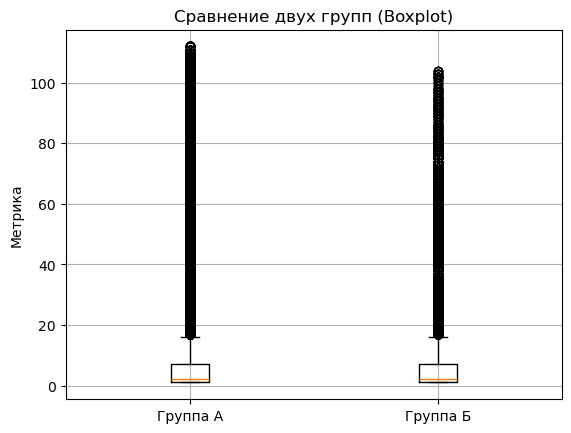

In [194]:
plt.boxplot([group_A_tr, group_B_tr], labels=['Группа А','Группа Б'])
plt.title('Сравнение двух групп (Boxplot)')
plt.ylabel('Метрика')
plt.grid()

In [ ]:
Применим критерий MW для сравнения двух выборок

In [202]:
u_stat, p_value = mannwhitneyu(group_A_tr, group_B_tr, alternative='two-sided')
print(f'U={u_stat}, p-value={p_value}')


U=696002204.0, p-value=0.2235595824741573


Отклоняем гипотезу, что выборки разные.
Также можно было приименить логарифмирование к данным, чтобы снизить дисперсию.

## Задание 4

Есть данные с большой дисперсией у метрики — дисперсию метрики можно посчитать для каждой группы. 
Для дальнейшего анализа этих данных дисперсию необходимо сократить.
Как определить, что дисперсия действительно большая? Если она большая, то как вы будете ее чистить?

Ответ аргументировать и описать.



Для начала определим, большая ли дисперсия. Для этого вычислим коэф вариаций, поделив дисперсию на среднее
Имеем огромное значение 50

50.46169279692764
Нормальное:
KS: 0.3430
p-value: 0.0000
Экспоненциальное:
KS: 0.4535
p-value: 0.0000
Логнормальное:
KS: 0.3504
p-value: 0.0000
Гамма:
KS: 0.4839
p-value: 0.0000


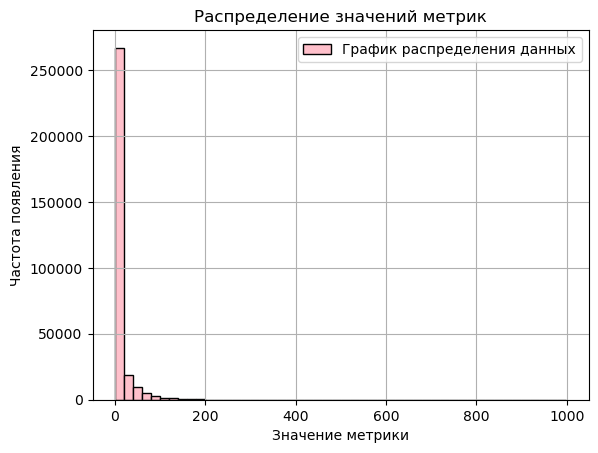

In [204]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('test_1_1.csv', sep=';')

mean = df['metrics'].mean()
var = df['metrics'].var()
cv = var/mean
print(cv)

# строим распределение
plt.hist(df['metrics'], bins = 50, color='pink', edgecolor='black', label='График распределения данных')
plt.title('Распределение значений метрик')
plt.xlabel('Значение метрики')
plt.ylabel('Частота появления')

plt.legend()
plt.grid()

Имеем огромное значение 50 коэфа вариаций
Прологорифмируем даные и обрежем по 99 перцинтилю

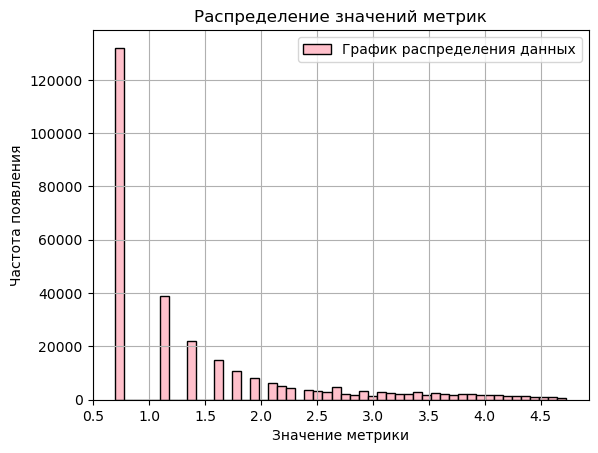

In [216]:
df_1 = df.copy()
df_1['log_metrics'] = np.log1p(df_1['metrics'])
p99 = df_1['log_metrics'].quantile(0.99)
df_1 = df_1[df_1['log_metrics'] <= p99]

# строим распределение
plt.hist(df_1['log_metrics'], bins = 50, color='pink', edgecolor='black', label='График распределения данных')
plt.title('Распределение значений метрик')
plt.xlabel('Значение метрики')
plt.ylabel('Частота появления')

plt.legend()
plt.grid()

In [218]:
mean = df_1['log_metrics'].mean()
var = df_1['log_metrics'].var()
cv = var/mean
print(cv)

0.72557538086837


Теперь дисперсия 0.7

## Задание 5

В компании проводится эксперимент с поисковыми подсказками. Вы хотите определить, как изменился CTR в каждой группе эксперимента.

Задача:
Сформировать метрику для оценки эксперимента
подобрать критерий под особенности данных
сделать вывод о значимости эффекта

Описание данных:

id — уникальный идентификатор пользователя
action — 🕊️
view — количество просмотров на одну сессию
variant — вариация в А/B тесте, где 0 — это версия "A", 1 — версия "B".

имеем ctr = action/vies - кол-во кликов на кол-во показов
Добавим эту колонку, убрав на всякий случай варианты у view = 0

U=8325404.5, p-value=0.3570928785921109


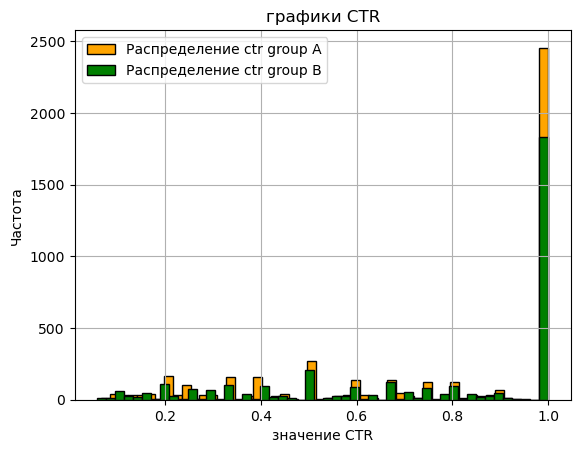

In [252]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_csv('task_5.csv', sep=';', skiprows=1)
df =df[df['view']!=0]
df['ctr'] = df['action']/df['view']

df.head()

group_A = df[df['variant']=='A']['ctr'].values
group_B = df[df['variant']=='B']['ctr'].values

plt.hist(group_A, bins = 50, color='orange', edgecolor='black', label='Распределение ctr group A')
plt.hist(group_B, bins = 50, color='green', edgecolor='black', label='Распределение ctr group B')
plt.title('графики CTR')
plt.xlabel('значение CTR')
plt.ylabel('Частота')

plt.legend()
plt.grid()

u_stat, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided')
print(f'U={u_stat}, p-value={p_value}')



# plt.hist()


итог - эффект не является значимым